# This is DTS 305 Lab work on Web Scraping from MAN-DTS M24 G2
## Name and Matric Number
### Ibraheem Alawode 2023/C/DSC/0169
### Yetunde Omotayo 2023/C/DSC/0146
### Glory Chidiogo Anekwe 2023/C?DSC/0074
### Ajidahun Daniel 2025/A/DSC/0044
### James Samuel 2024/B/B/DSC/0160
### Ehiorobo Vicent Etinosa 2024/B/DSC/0569

### Importing necessary libraries

In [1]:
# Import required libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# For inline plotting in Jupyter
%matplotlib inline

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

### Setting the Url and testing if the site is accessible

In [2]:
# Examine the website structure
url = "http://books.toscrape.com/"
print(f"Scraping URL: {url}")

# Make a test request to see if the site is accessible
test_response = requests.get(url, timeout=10)
print(f"Response Status: {test_response.status_code}")

Scraping URL: http://books.toscrape.com/
Response Status: 200


### Scraping the website with a defined function to scrape 20 books at once on the same page with specific features needed

In [3]:
def scrape_books_from_page(url):
    """
    Scrape book data from a single page
    """
    books_data = []
    
    try:
        # Send HTTP request
        response = requests.get(url, timeout=10)
        response.raise_for_status()  # Raise an error for bad status codes
        
        # Parse HTML content
        soup = BeautifulSoup(response.content, 'html.parser')
        
        # Find all book containers
        books = soup.find_all('article', class_='product_pod')
        
        for book in books:
            try:
                # Extract title
                title_tag = book.find('h3').find('a')
                title = title_tag.get('title', 'No Title')
                
                # Extract price
                price_tag = book.find('p', class_='price_color')
                price_text = price_tag.get_text(strip=True) if price_tag else '£0.00'
                
                # Extract rating
                rating_tag = book.find('p', class_='star-rating')
                rating_class = rating_tag.get('class', [''])[1] if rating_tag else 'Zero'
                
                # Extract availability
                availability_tag = book.find('p', class_='instock availability')
                availability = availability_tag.get_text(strip=True) if availability_tag else 'Not Available'
                
                books_data.append({
                    'Title': title,
                    'Price': price_text,
                    'Rating': rating_class,
                    'Availability': availability
                })
                
            except Exception as e:
                print(f"Error processing a book: {e}")
                continue
                
    except requests.RequestException as e:
        print(f"Error accessing {url}: {e}")
    except Exception as e:
        print(f"Error parsing page: {e}")
    
    return books_data

# Scrape books from the homepage
print("Scraping books from homepage...")
books_data = scrape_books_from_page("http://books.toscrape.com/")
print(f"Successfully scraped {len(books_data)} books")

Scraping books from homepage...
Successfully scraped 20 books


## Scraping multiple pages

In [4]:
def scrape_all_books(max_pages=49):
    """
    Scrape books from multiple pages
    """
    all_books = []
    base_url = "http://books.toscrape.com/catalogue/page-{}.html"
    
    for page_num in range(1, max_pages + 1):
        if page_num == 1:
            url = "http://books.toscrape.com/"
        else:
            url = base_url.format(page_num)
        
        print(f"Scraping page {page_num}...")
        page_books = scrape_books_from_page(url)
        all_books.extend(page_books)
        
        # Be respectful - add a small delay
        import time
        time.sleep(10)  # 10 second delay between requests
    
    return all_books

# Scrape from multiple pages (adjust max_pages as needed)
print("\n" + "="*50)
print("Scraping from multiple pages...")
all_books = scrape_all_books(max_pages=45)  
print(f"Total books scraped: {len(all_books)}")


Scraping from multiple pages...
Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...
Scraping page 11...
Scraping page 12...
Scraping page 13...
Scraping page 14...
Scraping page 15...
Scraping page 16...
Scraping page 17...
Scraping page 18...
Scraping page 19...
Scraping page 20...
Scraping page 21...
Scraping page 22...
Scraping page 23...
Scraping page 24...
Scraping page 25...
Scraping page 26...
Scraping page 27...
Scraping page 28...
Scraping page 29...
Scraping page 30...
Scraping page 31...
Scraping page 32...
Scraping page 33...
Scraping page 34...
Scraping page 35...
Scraping page 36...
Scraping page 37...
Scraping page 38...
Scraping page 39...
Scraping page 40...
Scraping page 41...
Scraping page 42...
Scraping page 43...
Scraping page 44...
Scraping page 45...
Total books scraped: 900


## Placing the scrapped data in Dataframe and perfoming some data preparation 

In [5]:
# Create DataFrame
df = pd.DataFrame(all_books)

# Display initial data
print("Initial DataFrame Info:")
print(f"Shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())
print("\nData Types:")
print(df.dtypes)
print("\nMissing Values:")
print(df.isnull().sum())

# Clean the data

# 1. Convert prices from strings to numerical values
def clean_price(price_str):
    """Extract numerical value from price string"""
    try:
        # Remove £ symbol and convert to float
        price = float(re.sub(r'[^\d.]', '', price_str))
        return price
    except:
        return 0.0

df['Price_Clean'] = df['Price'].apply(clean_price)

# 2. Map ratings to numerical values
rating_mapping = {
    'One': 1,
    'Two': 2,
    'Three': 3,
    'Four': 4,
    'Five': 5,
    'Zero': 0
}

df['Rating_Numeric'] = df['Rating'].map(rating_mapping)

# Display cleaned data
print("\n" + "="*50)
print("DATA AFTER CLEANING")
print("="*50)
print("\nPrice Statistics:")
print(f"Min Price: £{df['Price_Clean'].min():.2f}")
print(f"Max Price: £{df['Price_Clean'].max():.2f}")
print(f"Mean Price: £{df['Price_Clean'].mean():.2f}")
print(f"Median Price: £{df['Price_Clean'].median():.2f}")

print("\nRating Distribution:")
print(df['Rating_Numeric'].value_counts().sort_index())

Initial DataFrame Info:
Shape: (900, 4)

First 5 rows:
                                   Title   Price Rating Availability
0                   A Light in the Attic  £51.77  Three     In stock
1                     Tipping the Velvet  £53.74    One     In stock
2                             Soumission  £50.10    One     In stock
3                          Sharp Objects  £47.82   Four     In stock
4  Sapiens: A Brief History of Humankind  £54.23   Five     In stock

Data Types:
Title           object
Price           object
Rating          object
Availability    object
dtype: object

Missing Values:
Title           0
Price           0
Rating          0
Availability    0
dtype: int64

DATA AFTER CLEANING

Price Statistics:
Min Price: £10.00
Max Price: £59.99
Mean Price: £34.94
Median Price: £35.73

Rating Distribution:
Rating_Numeric
1    207
2    181
3    176
4    160
5    176
Name: count, dtype: int64


## Feature Engineering

In [10]:
# Create new features

# 1. Categorize books as "Affordable" or "Expensive"
df['Price_Category'] = pd.cut(df['Price_Clean'],
                               bins=[0, 20, float('inf')],
                               labels=['Affordable', 'Expensive'])

# 2. Check if we have any NaN in Price_Category
print(f"Books with undefined price category: {df['Price_Category'].isna().sum()}")

# 3. Calculate average rating for each category
avg_ratings = df.groupby('Price_Category', observed=True)[['Rating_Numeric']].mean()
print("\nAverage Ratings by Price Category:")
print(avg_ratings)

# 4. Create a feature for title length (additional feature)
df['Title_Length'] = df['Title'].apply(len)

# 5. Create a feature for availability status (boolean)
df['In_Stock'] = df['Availability'].str.contains('In stock', case=False, na=False)

# Display the engineered features
print("\n" + "="*50)
print("ENGINEERED FEATURES")
print("="*50)
print("\nPrice Category Distribution:")
print(df['Price_Category'].value_counts())
print("\nIn Stock Status:")
print(df['In_Stock'].value_counts())
print("\nFirst 5 rows with new features:")
print(df[['Title', 'Price_Clean', 'Price_Category', 'Rating_Numeric', 'Title_Length', 'In_Stock']].head())

Books with undefined price category: 0

Average Ratings by Price Category:
                Rating_Numeric
Price_Category                
Affordable            2.933702
Expensive             2.901252

ENGINEERED FEATURES

Price Category Distribution:
Price_Category
Expensive     719
Affordable    181
Name: count, dtype: int64

In Stock Status:
In_Stock
True    900
Name: count, dtype: int64

First 5 rows with new features:
                                   Title  Price_Clean Price_Category  \
0                   A Light in the Attic        51.77      Expensive   
1                     Tipping the Velvet        53.74      Expensive   
2                             Soumission        50.10      Expensive   
3                          Sharp Objects        47.82      Expensive   
4  Sapiens: A Brief History of Humankind        54.23      Expensive   

   Rating_Numeric  Title_Length  In_Stock  
0               3            20      True  
1               1            18      True  
2         

## Data Visaualization

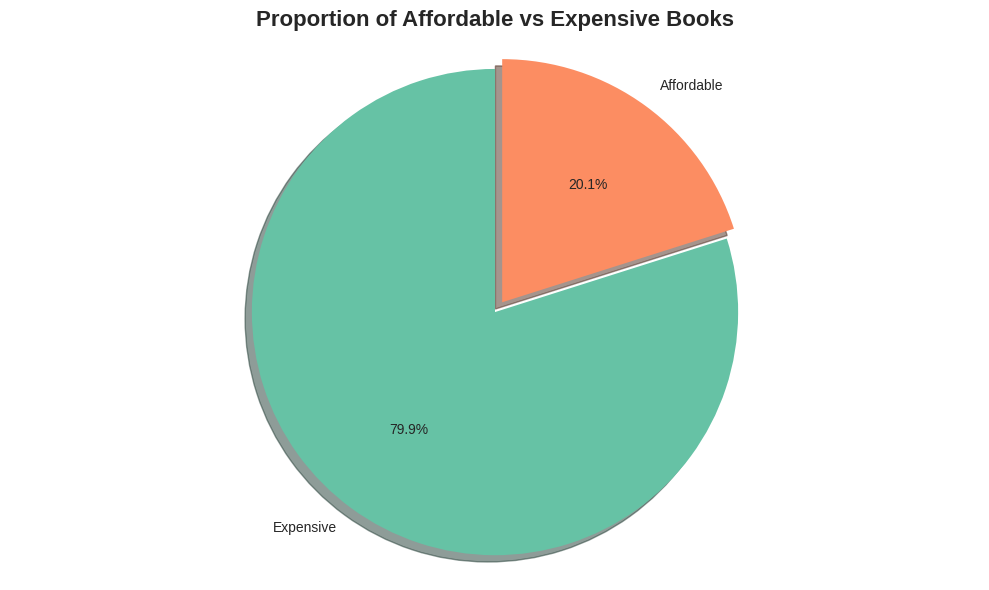

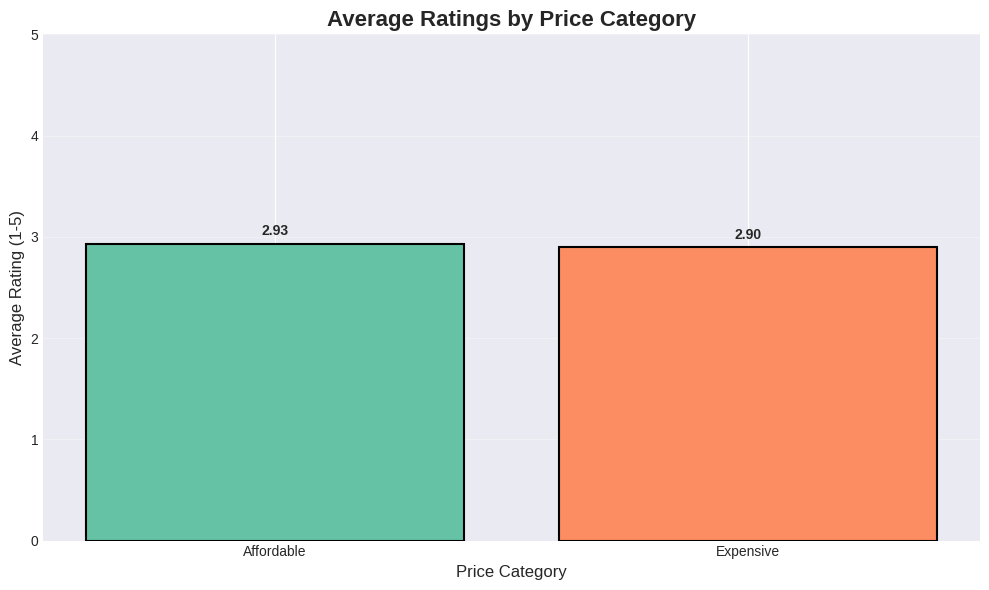

In [13]:
# Create visualizations

# Set figure size for all plots
plt.rcParams['figure.figsize'] = (12, 8)

# 1. Pie chart showing proportion of affordable vs expensive books
plt.figure(figsize=(10, 6))
price_counts = df['Price_Category'].value_counts()
colors = ['#66c2a5', '#fc8d62']  # Green for Affordable, Orange for Expensive
plt.pie(price_counts.values, labels=price_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90, explode=(0.05, 0), shadow=True)
plt.title('Proportion of Affordable vs Expensive Books', fontsize=16, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures the pie is circular
plt.tight_layout()
plt.show()

# 2. Bar chart of average ratings by category
plt.figure(figsize=(10, 6))
avg_ratings_plot = df['Rating_Numeric'].groupby(df['Price_Category'], observed=True).mean().sort_index()
bars = plt.bar(avg_ratings_plot.index, avg_ratings_plot.values, 
               color=['#66c2a5', '#fc8d62'], edgecolor='black', linewidth=1.5)

# Add value labels on top of bars
for bar, value in zip(bars, avg_ratings_plot.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
             f'{value:.2f}', ha='center', va='bottom', fontweight='bold')

plt.title('Average Ratings by Price Category', fontsize=16, fontweight='bold')
plt.xlabel('Price Category', fontsize=12)
plt.ylabel('Average Rating (1-5)', fontsize=12)
plt.ylim(0, 5)  # Ratings are on a 1-5 scale
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


## Exporting Clean Dataset

In [12]:
# Export the final dataset
output_file = 'books_scraped_cleaned.csv'
df.to_csv(output_file, index=False)
print(f"\n✓ Data exported to '{output_file}'")
print(f"✓ Total records: {len(df)}")


# Display final summary
print("\n" + "="*50)
print("FINAL SUMMARY")
print("="*50)
print(f"\nTotal books analyzed: {len(df)}")
print(f"Affordable books (< £20): {(df['Price_Clean'] < 20).sum()} ({(df['Price_Clean'] < 20).mean()*100:.1f}%)")
print(f"Expensive books (≥ £20): {(df['Price_Clean'] >= 20).sum()} ({(df['Price_Clean'] >= 20).mean()*100:.1f}%)")
print(f"\nAverage rating - Affordable books: {df[df['Price_Clean'] < 20]['Rating_Numeric'].mean():.2f}")
print(f"Average rating - Expensive books: {df[df['Price_Clean'] >= 20]['Rating_Numeric'].mean():.2f}")
print(f"\nBooks in stock: {df['In_Stock'].sum()} ({(df['In_Stock'].mean()*100):.1f}%)")


✓ Data exported to 'books_scraped_cleaned.csv'
✓ Total records: 900

FINAL SUMMARY

Total books analyzed: 900
Affordable books (< £20): 181 (20.1%)
Expensive books (≥ £20): 719 (79.9%)

Average rating - Affordable books: 2.93
Average rating - Expensive books: 2.90

Books in stock: 900 (100.0%)
